# 0 데이터분석에 사용할 라이브러리 로드 

In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 분석에 사용할 라이브러리 로드 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## cf) 폰트 설정

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 1 데이터 셋 로드 

In [4]:
import glob
path = glob.glob('data/*.csv')
path

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [5]:
# 각각의 데이터셋 import 
df_customers = pd.read_csv(path[0])
df_geolocation = pd.read_csv(path[1])
df_orders = pd.read_csv(path[2])
df_items = pd.read_csv(path[3])
df_payments = pd.read_csv(path[4])
df_reviews = pd.read_csv(path[5])
df_products = pd.read_csv(path[6])
df_sellers = pd.read_csv(path[7])
df_category = pd.read_csv(path[8])

# 3 Merge를 이용해 각각의 데이터셋 병합 

In [7]:
# merge
df = df_customers.merge(df_orders, on = 'customer_id', how = 'left')
df = df.merge(df_items, on ='order_id', how = 'outer')
df = df.merge(df_payments, on ='order_id', how = 'outer', validate ='m:m')
df = df.merge(df_reviews, on ='order_id', how ='outer')
df = df.merge(df_products, on ='product_id', how ='outer')
df = df.merge(df_category, on ='product_category_name', how ='outer')

In [8]:
#잘 병합 되었는지 확인
df.sample()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
95426,492b8f095527d8bfed2668e923cb83de,ee175b014077193f736905fa78257494,12328,jacarei,SP,f98fd69be8fcd65fd0c873c48e21bc44,delivered,2018-07-20 07:59:33,2018-07-20 08:15:09,2018-07-20 13:21:00,...,2018-07-24 21:06:48,papelaria,55.0,441.0,2.0,8350.0,35.0,60.0,20.0,stationery


# 4 데이터셋 정보 확인

In [12]:
df.shape

(119143, 37)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  order_item_id                 

In [10]:
df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [11]:
df.tail(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
119141,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,76940,rolim de moura,RO,2c4ada2e75c2ad41dd93cebb5df5f023,delivered,2017-01-26 11:09:00,2017-01-26 11:22:17,2017-01-27 14:59:35,...,2017-02-16 02:54:35,seguros_e_servicos,55.0,506.0,1.0,1225.0,27.0,35.0,15.0,security_and_services
119142,919570a26efbd068d6a0f66d5c5072a3,141e824b8e0df709e3fcf6d982225a8e,71940,brasilia,DF,bede3503afed051733eeb4a84d1adcc5,delivered,2017-09-17 16:51:43,2017-09-19 04:05:52,2017-09-19 20:22:49,...,2017-09-30 20:49:37,seguros_e_servicos,48.0,461.0,4.0,400.0,26.0,22.0,11.0,security_and_services


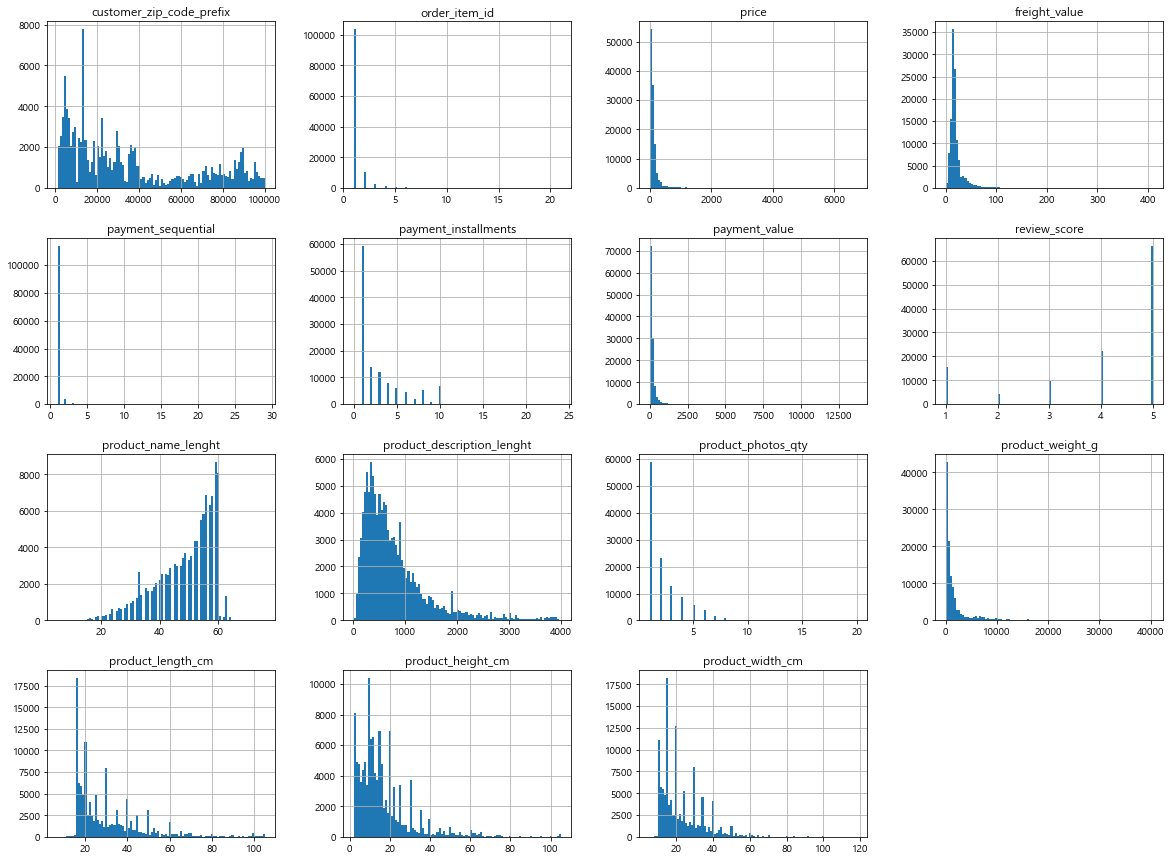

In [13]:
_ = df.hist(figsize=(20, 15), bins=100)

In [15]:
df.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154


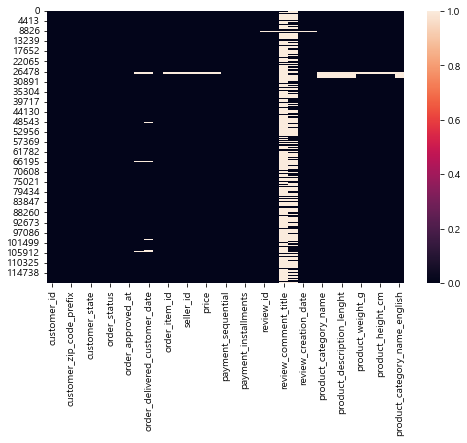

In [16]:
plt.figure(figsize = (8, 5))
sns.heatmap(df.isnull())
plt.show()